In [97]:

import requests
import json
import csv

# data science everytime needed libraires
import pandas as pd
import numpy as np
# data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
url = 'https://data.pandonia-global-network.org/WashingtonDC/Pandora140s1/L2/Pandora140s1_WashingtonDC_L2_rfus5p1-8.txt'
response = requests.get(url)
if response.status_code == 200:
    text_data = response.text


metadata = {}
column_list = []

bigger_list_content = text_data.splitlines()
dotted_line = '---------------------------------------------------------------------------------------'

for line in bigger_list_content:
    if line == dotted_line:
        break
    else:
        key, value = line.split(':')
        metadata[key] = value

with open('dummy_metadata.json', 'w') as f:
    json.dump(metadata, f)

def indices(lst, dotted_line):
    return [i for i, x in enumerate(lst) if x == dotted_line]

position_of_dotted_lines = indices(bigger_list_content, dotted_line)


index = 0
Columnlist = []

for index in range(position_of_dotted_lines[0]+1,(position_of_dotted_lines[1])):
    key2, value2 = (bigger_list_content[index]).split(':')
    value2 = value2.strip()
    Columnlist.append(value2)    

# Creating a list of Data Values
DataList = []
for index in range(position_of_dotted_lines[1]+1,len(bigger_list_content)):
   DataList.append(bigger_list_content[index])

# Creating a New Data List, which is a list of lists
DataList[0].split()
NewDataList = []
zNewDataList = []

for i in range(len(DataList)):
    NewDataList.append(DataList[i].split()) 
 
# Creating a list of Dictionaries
list_of_dicts = [dict(zip(Columnlist, values)) for values in NewDataList]

print (list_of_dicts[0])
print (list_of_dicts[4])

# Creating a CSV File
filename = 'output.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=list_of_dicts[0].keys())

    writer.writeheader()

    for data in list_of_dicts:
        writer.writerow(data)


{'UT date and time for measurement center, yyyymmddThhmmssZ (ISO 8601)': '20200806T154209.4Z', 'Fractional days since 1-Jan-2000 UT midnight for measurement center': '7523.654276', 'Effective duration of measurement [s]': '40.84', 'Solar zenith angle for measurement center [deg]': '30.12', 'Solar azimuth for measurement center [deg], 0=north, increases clockwise': '131.84', 'Lunar zenith angle for measurement center [deg]': '121.15', 'Lunar azimuth for measurement center [deg], 0=north, increases clockwise': '284.03', 'rms of unweighted fitting residuals, -9=fitting not successful': '6.654e-04', 'Normalized rms of fitting residuals weighted with independent uncertainty, -9=fitting not successful or no uncertainty given': '6.415e-04', 'Expected rms of unweighted fitting residuals based on independent uncertainty, -9=fitting not successful or no uncertainty given': '5.843e-05', 'Expected normalized rms of weighted fitting residuals based on independent uncertainty, -9=fitting not success

In [81]:
df = pd.read_csv('/Users/lotuskhanal/Documents/datascience_journey/output.csv')
df = df[['UT date and time for measurement center, yyyymmddThhmmssZ (ISO 8601)', 'Formaldehyde total vertical column amount [moles per square meter], -9e99=retrieval not successful', 'L2 data quality flag for formaldehyde, 0=assured high quality, 1=assured medium quality, 2=assured low quality, 10=not-assured high quality, 11=not-assured medium quality, 12=not-assured low quality, 20=unusable high quality, 21=unusable medium quality, 22=unusable low quality']]
df

,"UT date and time for measurement center, yyyymmddThhmmssZ (ISO 8601)","Formaldehyde total vertical column amount [moles per square meter], -9e99=retrieval not successful","L2 data quality flag for formaldehyde, 0=assured high quality, 1=assured medium quality, 2=assured low quality, 10=not-assured high quality, 11=not-assured medium quality, 12=not-assured low quality, 20=unusable high quality, 21=unusable medium quality, 22=unusable low quality"
0,20200806T154209.4Z,0.000181,12
1,20200806T154349.3Z,0.000170,12
2,20200806T155123.7Z,0.000258,12
3,20200806T155323.9Z,0.000206,11
4,20200806T155523.8Z,0.000205,12
...,...,...,...
101213,20240430T205342.2Z,0.000236,12
101214,20240430T205828.1Z,0.000245,12
101215,20240430T211818.4Z,0.000220,12
101216,20240430T212345.1Z,0.000162,12


In [83]:
from datetime import datetime

# Example with the standard date and time format
date_str = '02:2024T20 12:14:50'
date_format = '%m:%YT%d %H:%M:%S'

date_obj = datetime.strptime(date_str, date_format)
print(date_obj)


2024-02-20 12:14:50


In [90]:
# date_obj.dt.month_name()
# how to apply a function to a whole pandas column

def increase_colVal_by_1(x):
    return x + 1

df['Formaldehyde total vertical column amount [moles per square meter], -9e99=retrieval not successful'] = df['Formaldehyde total vertical column amount [moles per square meter], -9e99=retrieval not successful'].map(increase_colVal_by_1)
df

,"UT date and time for measurement center, yyyymmddThhmmssZ (ISO 8601)","Formaldehyde total vertical column amount [moles per square meter], -9e99=retrieval not successful","L2 data quality flag for formaldehyde, 0=assured high quality, 1=assured medium quality, 2=assured low quality, 10=not-assured high quality, 11=not-assured medium quality, 12=not-assured low quality, 20=unusable high quality, 21=unusable medium quality, 22=unusable low quality"
0,20200806T154209.4Z,1.000181,12
1,20200806T154349.3Z,1.000170,12
2,20200806T155123.7Z,1.000258,12
3,20200806T155323.9Z,1.000206,11
4,20200806T155523.8Z,1.000205,12
...,...,...,...
101213,20240430T205342.2Z,1.000236,12
101214,20240430T205828.1Z,1.000245,12
101215,20240430T211818.4Z,1.000220,12
101216,20240430T212345.1Z,1.000162,12


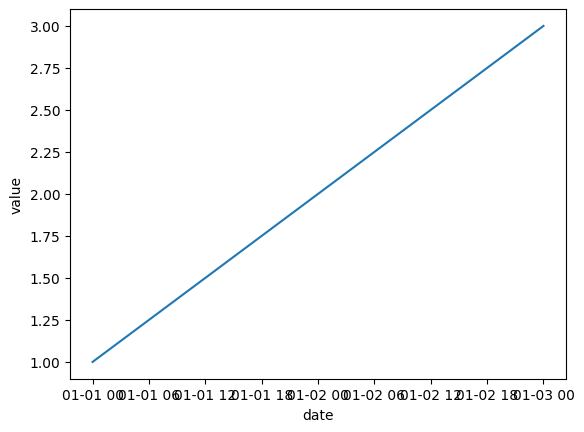

In [98]:
df = pd.DataFrame({'date': pd.to_datetime(['2020-01-01', '2020-01-02', '2020-01-03']), 'value': [1, 2, 3]})
# df
sns.lineplot(x='date', y='value', data=df)
plt.show()

In [ ]:
# 
